<h1>Welcome to The Computer Vision Workshop</h1>
<h2> Chapter 4: Working with Contours</h2>


<p>This chapter will familiarize you with the concept of contours. You will learn how to detect nested contours and access specific contours with a given shape or moment distribution. In short, we will learn how to fetch objects of interest from an image. </p>

<h3>Introduction to Contours</h3>
<p>A contour is the boundary of an object – it is a closed shape along the portion of an image that has the same color or intensity.
</br>
<ul>
<li>In terms of OpenCV, a contour is the boundary of a group of white pixels on a black background.</li>
<li> Yes, in OpenCV, contours can be extracted <b>only from binary images</b>.</li>
<li>In practical terms, contours can help you to <b>count the number of objects</b> in an image</li>
<li>You can also use contours to <b>identify your object(s) of interest</b> in a given image</li>
</ul>
</p>

<h3>Contours – Basic Detection and Plotting</h3>
<p>To find the contours in a colored image:</p>
<ul>
    <li> first, you will need to convert it to grayscale. </li>
    <li> After that, you will segment it to convert it to binary.</li>
    <li>  This segmentation can be done either with thresholding based on a fixed grayscale value of your choice or by using Otsu's method</li>
</ul>
</p>

<h4>Plotting Histograms with Matplotlib</h4>
<p> The command to detect contours in an image is as follows:
</br>
<code>contours, hierarchy = cv2.findContours(source_image, retrieval_mode, approx_method)
</code></br>
There are two outputs of this function:
<ul>
<li> <code>contours</code> is a list containing all detected contours in the source image.</li>
<li> <code>hierarchy</code> is a variable that tells you the relationship between contours.</li> 
<ul>
<li>For example, is a contour enclosed within another?</li>
<li>If yes, then is that larger contour located within a still larger contour?</li>
</ul>
</ul>
Here is a brief explanation of the inputs of this function:
<ul>
<li><code>source_image</code> is your input binary image. To detect contours, the background of this binary image must be black. Contours are extracted from white blobs.</li>
<li><code>retrieval_mode</code> is a flag that instructs the <code>cv2.findContours</code> function on how to fetch all contours. (Should all contours be fetched independently? If a contour lies inside another larger contour, should that information be returned? If many contours lie inside a larger contour, should the internal contours be returned, or will just the outer contour suffice?)</li>
<ul>
<li><code>cv2.RETR_EXTERNAL</code>: only want to fetch all the extreme outer contours.  This will ignore all those contours that lie inside other contours.</li>
<li><code>cv2.RETR_LIST </code>: retrieve all contours independently and do not care which lies inside which one</li>
<li><code>cv2.RETR_CCOMP </code>: finding the outer and inner boundaries of objects (two levels only: the border of the outer shape and the boundary of the inner hole)</li>
<li><code>cv2.RETR_TREE </code>: make a detailed family tree covering all generations (parent, child, grandchild, and great-grandchild)</li>
</ul>
<li><code>approx_method</code> is a flag that tells this function how to store the boundary points of a detected contour.</li>
<ul>
<li><code>cv2.CHAIN_APPROX_NONE</code>: each coordinate point be saved.</li>
<li><code>cv2.CHAIN_APPROX_SIMPLE </code>: only those points be saved that are strictly needed to draw the contour.  This will save you a lot of memory</li>
</ul>

</ul>
</p>

<h2>Detecting Shapes and Displaying Them on BGR Images</h2>

In [5]:
#Import OpenCV as follows:
import cv2
import matplotlib.pyplot as plt

#Read the image as a BGR image:
dir = "The-Computer-Vision-Workshop/Chapter04/data/"
image = cv2.imread(dir + 'sample shapes.png')

# Convert it to grayscale:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

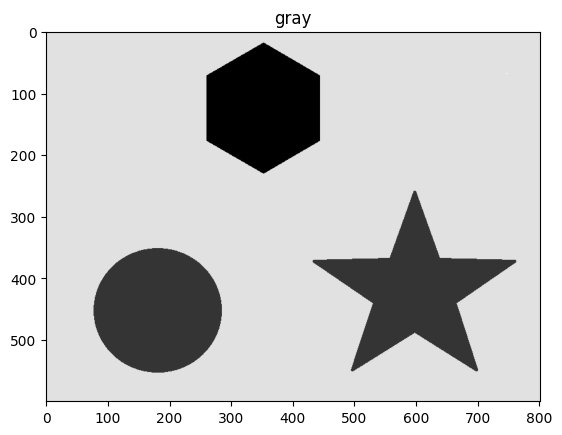

In [6]:
# Perform translation using NumPy
plt.imshow(gray_image, cmap='gray')
plt.title("gray")
plt.show()

<h4>use Otsu's method to do segmentation</h4>

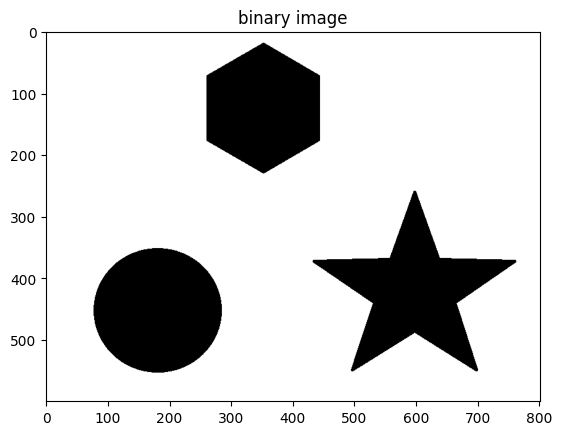

In [7]:
ret,binary_im = cv2.threshold(gray_image,0,255,\
                              cv2.THRESH_OTSU)
plt.imshow(binary_im, cmap='gray')
plt.title("binary image")
plt.show()

<h4>Contour Detection</h4>
<p>To apply OpenCV's implementation of contour detection here, first we need to make the background black and the foreground white. This is called inverting an image.</p>
<p> In colored images, black is represented by 0 and white by 255. So, to invert it, we will simply apply the following formula: <code>pixel= 255 – pixel</code>. This is applied to the whole image as <code>image= 255 – image</code>.

In Python, an OpenCV image is stored as a NumPy array. Therefore, we can simply invert it as <code>image= ~image</code>.

Both commands give identical results.
</p>

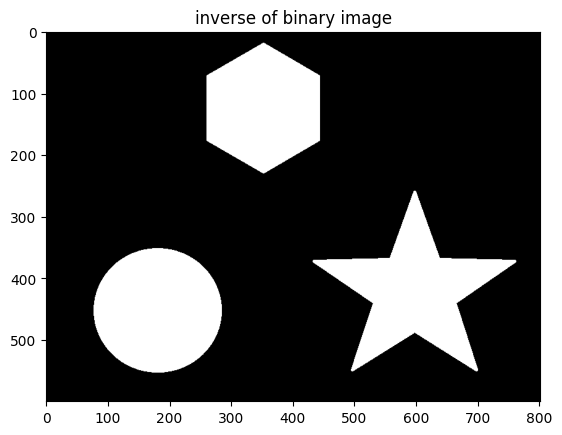

In [9]:
inverted_binary_im= ~binary_im
plt.imshow(inverted_binary_im, cmap='gray')
plt.title("inverse of binary image")
plt.show()

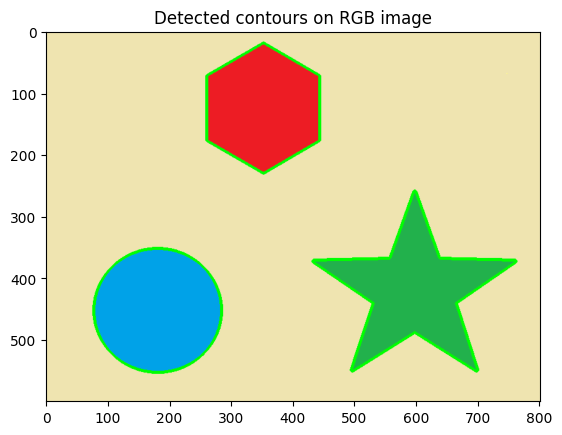

In [12]:
# Find the contours in the binary image:
contours,hierarchy = cv2.findContours(inverted_binary_im,\
                                     cv2.RETR_TREE,\
                                     cv2.CHAIN_APPROX_SIMPLE)
# Now, mark all the detected contours on the original BGR image in any color (say, green). We will set the thickness to 3
with_contours = cv2.drawContours(image, contours, -1,(0,255,0),3)

plt.imshow( cv2.cvtColor(with_contours, cv2.COLOR_BGR2RGB) )
plt.title("Detected contours on RGB image")
plt.show()

In [13]:
print(f'Total number of detected contours is:{len(contours)}')


Total number of detected contours is:3


<h2>Detecting Shapes and Displaying Them on Black and White Images</h2>
<p>To draw contours with a BGR color code, the image must have three channels.</p>

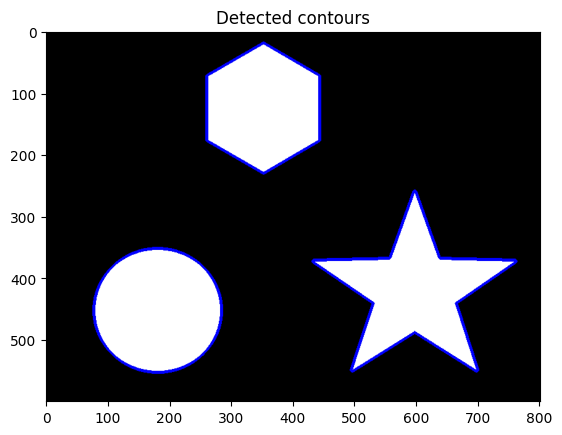

In [14]:
bgr = cv2.merge([inverted_binary_im, \
                inverted_binary_im, inverted_binary_im]);

# Now, mark all the detected contours on this generated BGR image in any color (say, blue). We will keep the thickness set to 3
with_contours = cv2.drawContours(bgr, contours, \
                -1, (255,0, 0),3)

plt.imshow( cv2.cvtColor(with_contours, cv2.COLOR_BGR2RGB) )
plt.title("Detected contours")
plt.show()

<h3>Displaying Different Contours with Different Colors and Thicknesses</h3>
we will do the following:
<ul>
<li>Mark contour number 1 in red color with a thickness of 10.</li>
<li>Mark contour number 2 in green color with a thickness of 20.</li>
<li>Mark contour number 3 in blue color with a thickness of 30.</li>
</ul>

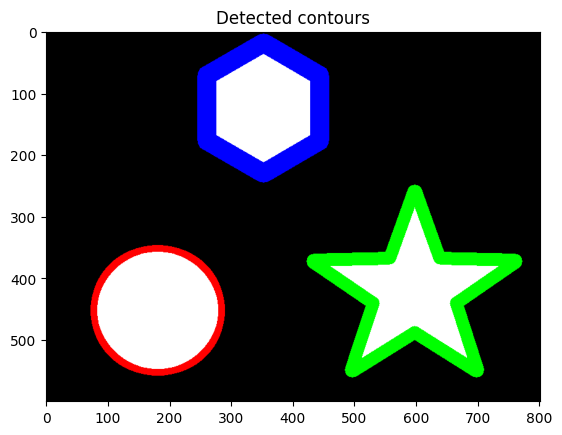

In [15]:
# Take the BGR image stored in the bgr variable created in Step 1 of the previous exercise

# draw contour #0 on it (that is, index 0 in the list of contours) in red (BGR code: 0, 0, 255)
with_contours = cv2.drawContours(bgr, contours, 0,(0,0,255),10)
# draw contour number 1 on it (that is, index 1 in the list of contours) in green (BGR code: 0, 255, 0). 
with_contours = cv2.drawContours(with_contours, contours, \
                                 1,(0, 255, 0),20)
# draw contour number 2 on it (that is, index 2 in the list of contours) in blue (BGR code: 255, 0, 0)
with_contours = cv2.drawContours(with_contours, contours, \
                                 2, (255,0, 0), 30)

# Display the result using the following code
plt.imshow( cv2.cvtColor(with_contours, cv2.COLOR_BGR2RGB) )
plt.title("Detected contours")
plt.show()

<h3>Drawing a Bounding Box around a Contour</h3>
<p>
by passing that contour into the cv2.boundingRect function:
</br>
<code>x, y, w, h= cv2.boundingRect(my_contour)</code>
</br>
To get these parameters for the first detected contour (which is the contour at index=0 in the list of contours) on the image
</br>
<code>
x,y,w,h = cv2.boundingRect(contours[0])</code>
</br>
The next step is to plot these values on the image. For this, we will use OpenCV's <code>cv2.rectangle</code> command:
</br>
<code>
cv2.rectangle(img,(x,y), (x+w,y+h), color_code, thickness)</code>
</p>

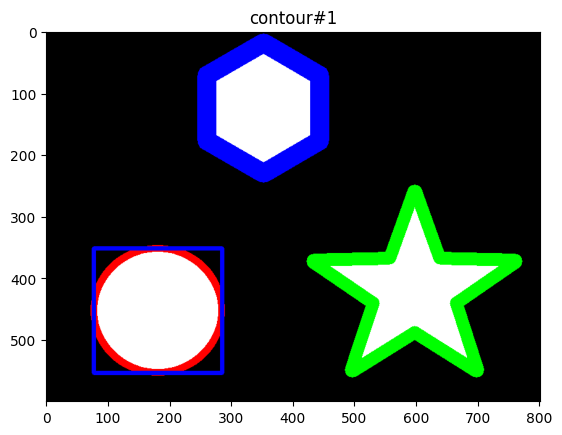

In [16]:
x, y, w, h= cv2.boundingRect(contours[0])
cv2.rectangle(with_contours,(x,y), (x+w,y+h), \
              (255,0,0), 5)
plt.imshow( cv2.cvtColor(with_contours, cv2.COLOR_BGR2RGB) )
plt.title("contour#1")
plt.show()

<h4>Area of a Contour</h4>

In [17]:
# One of the most commonly used attributes is the area of a contour
contour_area = cv2.contourArea(contours[0])

# retrieve the contour with the maximum area
max_area_cnt = max(contours, key = cv2.contourArea)

# fetch the contour with the minimum area
min_area_cnt = min(contours, key = cv2.contourArea)

print(f"Area of Contour#1 is: {contour_area}")

Area of Contour#1 is: 32669.5


<h3>Hierarchy in Contours</h3>
<img src="The-Computer-Vision-Workshop/Chapter04/data/contour_hierarchy_annotation.png">

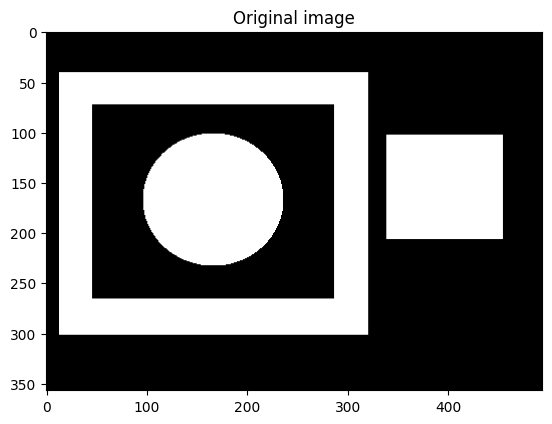

In [18]:
import cv2 

dir = "The-Computer-Vision-Workshop/Chapter04/data/"
image = cv2.imread(dir + 'contour_hierarchy.png')
imagecopy= image.copy()


plt.imshow( cv2.cvtColor(image, cv2.COLOR_BGR2RGB) )
plt.title('Original image')
plt.show()

In [20]:
# We first need to convert the image to grayscale using the following code:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Now, we can convert it to binary:
ret, im_binary = cv2.threshold(gray_image, 00, 255, cv2.THRESH_BINARY)


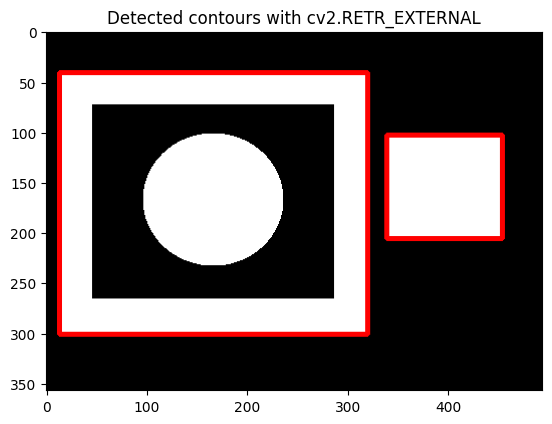

In [22]:
# Find the contours in the binary image:
contours,hierarchy = cv2.findContours(im_binary,\
                                     cv2.RETR_EXTERNAL,\
                                     cv2.CHAIN_APPROX_SIMPLE)
# Now, mark all the detected contours on the original BGR image in any color (say, green). We will set the thickness to 3
with_contours = cv2.drawContours(imagecopy, contours, -1,(0,0,255),3)

plt.imshow( cv2.cvtColor(with_contours, cv2.COLOR_BGR2RGB) )
plt.title("Detected contours with cv2.RETR_EXTERNAL")
plt.show()

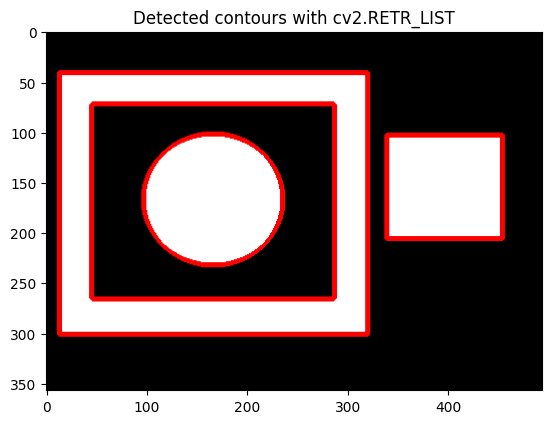

In [23]:
# Find the contours in the binary image:
contours,hierarchy = cv2.findContours(im_binary,\
                                     cv2.RETR_LIST,\
                                     cv2.CHAIN_APPROX_SIMPLE)
# Now, mark all the detected contours on the original BGR image in any color (say, green). We will set the thickness to 3
with_contours = cv2.drawContours(imagecopy, contours, -1,(0,0,255),3)

plt.imshow( cv2.cvtColor(with_contours, cv2.COLOR_BGR2RGB) )
plt.title("Detected contours with cv2.RETR_LIST")
plt.show()

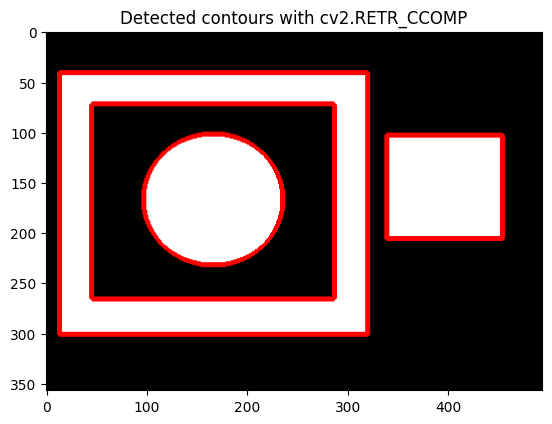

In [24]:
# Find the contours in the binary image:
contours,hierarchy = cv2.findContours(im_binary,\
                                     cv2.RETR_CCOMP,\
                                     cv2.CHAIN_APPROX_SIMPLE)
# Now, mark all the detected contours on the original BGR image in any color (say, green). We will set the thickness to 3
with_contours = cv2.drawContours(imagecopy, contours, -1,(0,0,255),3)

plt.imshow( cv2.cvtColor(with_contours, cv2.COLOR_BGR2RGB) )
plt.title("Detected contours with cv2.RETR_CCOMP")
plt.show()

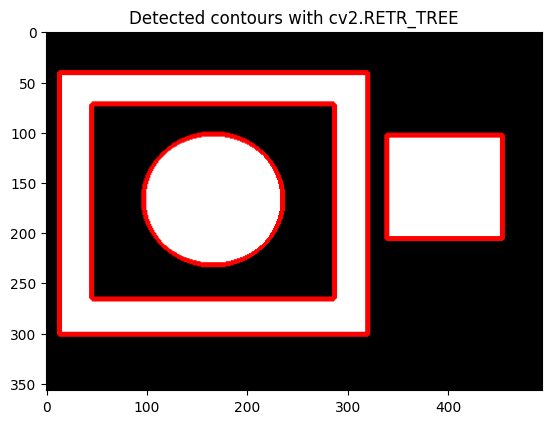

In [25]:
# Find the contours in the binary image:
contours,hierarchy = cv2.findContours(im_binary,\
                                     cv2.RETR_TREE,\
                                     cv2.CHAIN_APPROX_SIMPLE)
# Now, mark all the detected contours on the original BGR image in any color (say, green). We will set the thickness to 3
with_contours = cv2.drawContours(imagecopy, contours, -1,(0,0,255),3)

plt.imshow( cv2.cvtColor(with_contours, cv2.COLOR_BGR2RGB) )
plt.title("Detected contours with cv2.RETR_TREE")
plt.show()

<h2>Exercise: Detecting a Bolt and a Nut</h2>

In [26]:
import cv2
import matplotlib.pyplot as plt

#Read the image as a BGR image:
dir = "The-Computer-Vision-Workshop/Chapter04/data/"


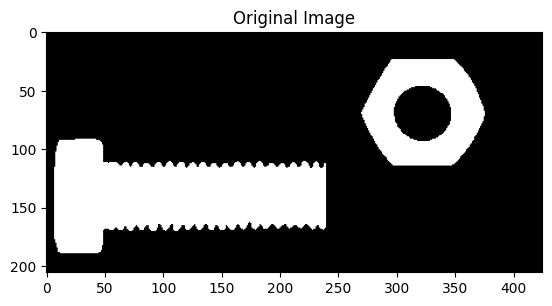

In [28]:
# Read the three-channel black and white image:
image_3chan = cv2.imread(dir + 'nut_bolt.png')
image_3chan_copy= image_3chan.copy()

# Display the original image:
plt.imshow( image_3chan[:,:,::-1] )
plt.title("Original Image")
plt.show()

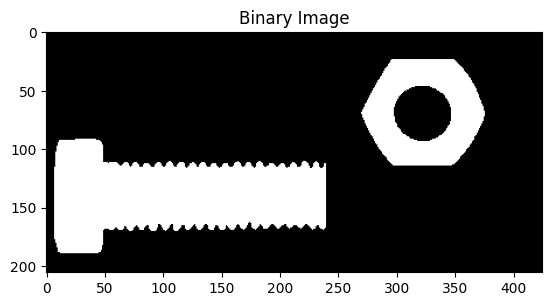

In [31]:
# Convert it to grayscale:
gray_image = cv2.cvtColor(image_3chan, cv2.COLOR_BGR2GRAY)

# Then, convert it to binary (using any suitable threshold) and display it as follows:
ret,binary_im = cv2.threshold(gray_image,250,255,cv2.THRESH_BINARY)

# Display the original image:
plt.imshow( binary_im, cmap='gray' )
plt.title("Binary Image")
plt.show()

In [33]:
# Find all contours in this image:
contours_list,hierarchy = cv2.findContours(binary_im,\
                                          cv2.RETR_TREE,\
                                          cv2.CHAIN_APPROX_SIMPLE)
# We used RETR_TREE mode to get the contours because we are going to need their parent-child relationships.

# Let's print the hierarchy variable to see what it contains:
print('Hierarchy information of all contours:')
print(hierarchy)

Hierarchy information of all contours:
[[[ 1 -1 -1 -1]
  [-1  0  2 -1]
  [-1 -1 -1  1]]]


In [34]:
for i in range(0, len(contours_list)):
    contour_info= hierarchy[0][i, :]
    print('Hierarchy information of current contour:')
    print(contour_info)
    
    if contour_info[2]==-1 and contour_info[3]==-1:         # no parent, no child

        with_contours = cv2.drawContours(image_3chan_copy,\
                        contours_list,i,[0,255,0],thickness=3)

        print('Bolt contour is detected')
    if contour_info[2]==-1 and contour_info[3]!=-1:         # no child but parent is present

        with_contours = cv2.drawContours(with_contours,\
                        contours_list,i,[0,0,255],thickness=3)

        print('Hole of nut is detected')

Hierarchy information of current contour:
[ 1 -1 -1 -1]
Bolt contour is detected
Hierarchy information of current contour:
[-1  0  2 -1]
Hierarchy information of current contour:
[-1 -1 -1  1]
Hole of nut is detected


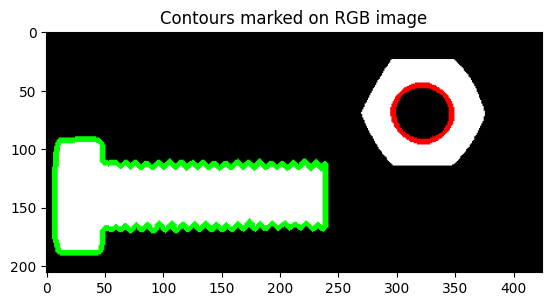

In [35]:
# Display the contoure identified image:
plt.imshow( with_contours[:,:,::-1] )
plt.title("Contours marked on RGB image")
plt.show()

<h2>Exercise: Detecting a Basketball Net in an Image</h2>
<p>Your task is to draw a bounding box around the basket after detecting it. </p>

In [36]:
import cv2
import matplotlib.pyplot as plt

#Read the image as a BGR image:
dir = "The-Computer-Vision-Workshop/Chapter04/data/"

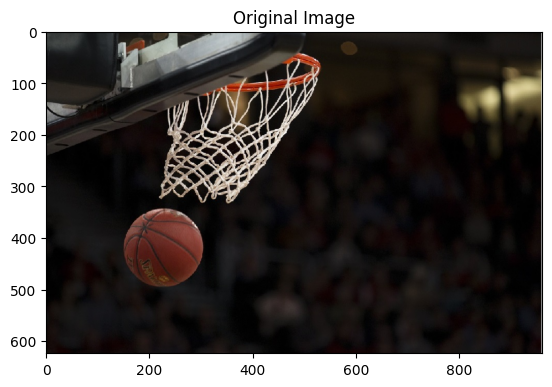

In [46]:
# Read the colored image using the following code:

image = cv2.imread(dir + 'basketball.jpg')
imageCopy= image.copy()

plt.imshow(image[:,:,::-1])
plt.title("Original Image")
plt.show()

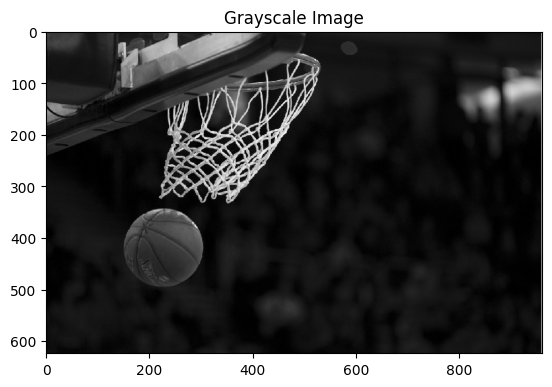

In [39]:
# Convert the image to grayscale and display it as follows:

gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.show()

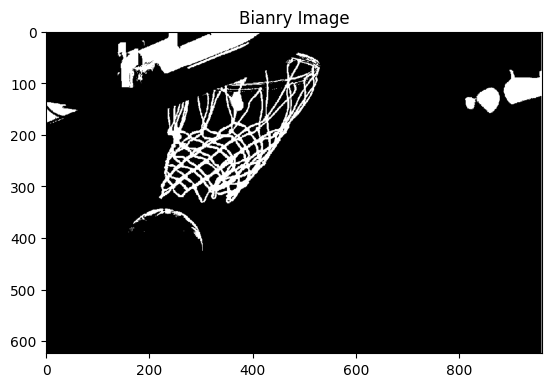

In [40]:
# Convert this grayscale image to a binary image using a threshold such that the entire white boundary region of the basketball net is detected as a single blob:
ret,binary_im = cv2.threshold(gray_image, 100, 255, \
                              cv2.THRESH_BINARY)
# Using trial and error, we found 100 to be the best threshold, in this case, to convert the image to binary.
# If you find that some other threshold works better, feel free to use that.

plt.imshow( binary_im, cmap ='gray')
plt.title("Bianry Image")
plt.show()

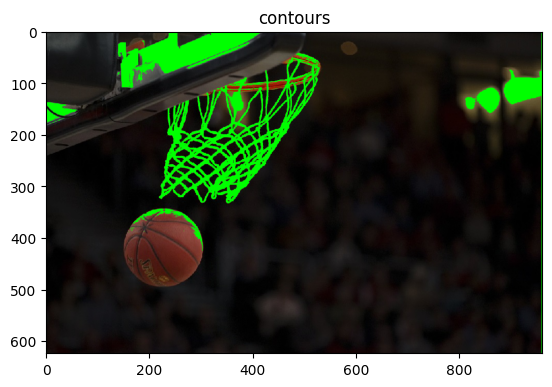

In [41]:
# Detect all contours using the following code:
contours,hierarchy = cv2.findContours(binary_im,\
                     cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Draw all the detected contours on the image and then display the image. Use the following code to plot all the contours in green
contours_to_plot= -1
plotting_color= (0,255,0)
# if we want to fill the drawn contours with color
thickness= -1
with_contours = cv2.drawContours(image, contours, contours_to_plot, \
                                 plotting_color,thickness)

plt.imshow(with_contours[:,:,::-1])
plt.title("contours")
plt.show()

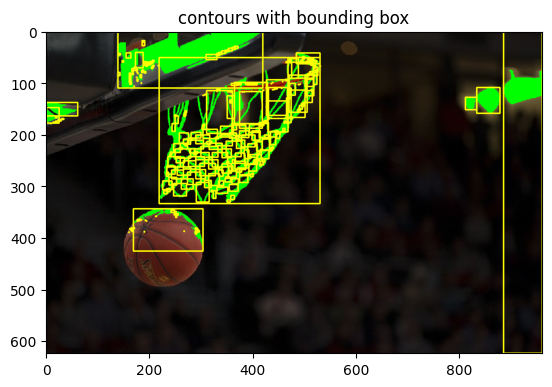

In [43]:
# Next, we must plot bounding boxes around all contours. The code for this is given in the following snippet:

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    image = cv2.rectangle(image,(x,y),(x+w,y+h),\
                          (0,255,255),2) # yellow: (0,255,255)

# Now, display the image using the following code:
plt.imshow(image[:,:,::-1])
plt.title('contours with bounding box')
plt.show()

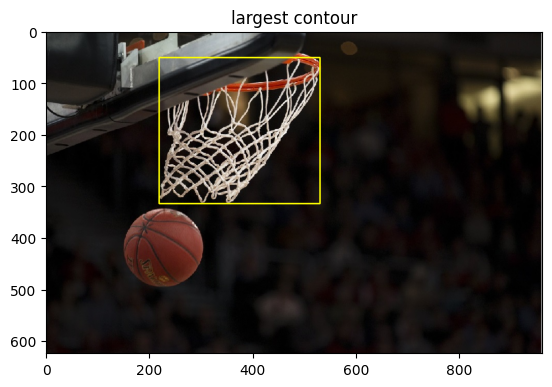

In [47]:
# Find the contour with the largest area:
required_contour = max(contours, key = cv2.contourArea)

# Find the starting x and y coordinates and the width and height of a rectangular bounding box that should enclose this largest contour:
x,y,w,h = cv2.boundingRect(required_contour)

# Draw this bounding box on a copy of the original colored image that you had saved earlier:
img_copy2 = cv2.rectangle(imageCopy, (x,y),(x+w, y+h),\
                        (0,255,255),2) 

# Now, display this image with the bounding box drawn over it:
plt.imshow(img_copy2[:,:,::-1])
plt.title('largest contour')
plt.show()

<h2>Contour Matching</h2>

In [51]:

dir = "The-Computer-Vision-Workshop/Chapter04/data/"
image = cv2.imread(dir + 'contour_hierarchy.png')
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Image moments can be computed with the following command:
img_moments= cv2.moments(gray_image)

# The cv2.HuMoments OpenCV function is given the following moments as input:
hu_moments= cv2.HuMoments(img_moments)

# This array is then flattened to get the feature vector for the Hu moments:
hu_moments= hu_moments.flatten()
print(hu_moments)

[1.38828474e-03 4.35338956e-07 2.57134848e-10 2.79715741e-12
 7.21963195e-23 1.79841434e-15 2.03750238e-23]


<h4>Shape Matching</h4>
<p>The command to perform shape matching (the comparison of two shapes) using Hu moments is given in the following code. It will give you a numerical value describing how different the two shapes are from one another:</br>
<code>contour_difference = cv2.matchShapes (contour1, contour2, 
                                      compar_method, parameter)</code>
<img src="https://scorm.go1static.com/vault/61d59849-f9a0-4096-b002-316cd91aa1c0/r/4/production/6677040/37137034/0/scormcontent/assets/-v2lqZzcR6WctsuX_FuEibulpPcsziR4y.png">
</p>

<h2>Exercise: Detecting Fruits in an Image</h2>

In [52]:
import cv2
import matplotlib.pyplot as plt

#Read the image as a BGR image:
dir = "The-Computer-Vision-Workshop/Chapter04/data/"

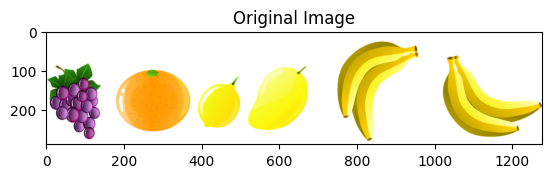

In [73]:
image = cv2.imread(dir + 'many fruits.png')
imageCopy = image.copy()

plt.imshow(image[:,:,::-1])
plt.title("Original Image")
plt.show()

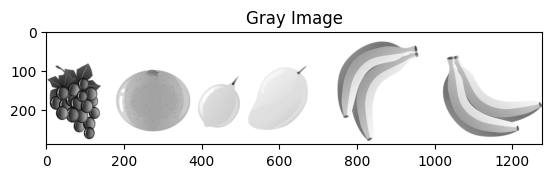

In [54]:
# Convert it to grayscale and display it as follows:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.title("Gray Image")
plt.show()

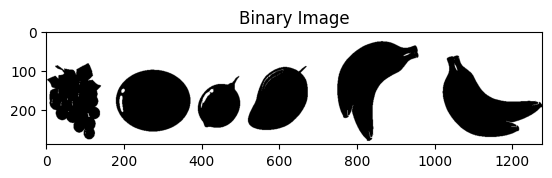

In [55]:
# Convert it to binary using a suitable threshold and display it. The threshold you select must give the outer boundaries of the fruits as single objects. It is okay if some holes remain in the middle of each fruit:

ret,binary_im = cv2.threshold(gray_image,245,\
                              255,cv2.THRESH_BINARY)
plt.imshow(binary_im, cmap='gray')
plt.title("Binary Image")
plt.show()

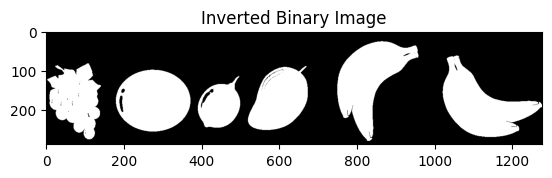

In [56]:
# we require a white foreground on a black background to do contour detection in OpenCV, we will invert this image as follows:
binary_im= ~binary_im

plt.imshow(binary_im, cmap='gray')
plt.title("Inverted Binary Image")
plt.show()

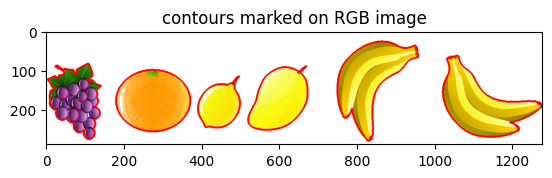

In [57]:
# Note that there are some empty pixels inside the fruits, so we will do external contour detection next.
contours,hierarchy = cv2.findContours(binary_im,\
                     cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)     # Find all the external contours

# Draw these contours in red on the original image and display it
with_contours = cv2.drawContours(image,contours,\
                                 -1,(0,0,255),3)

plt.imshow(with_contours[:,:,::-1])
plt.title("contours marked on RGB image")
plt.show()

<h2>Exercise: Identifying Bananas from the Image of Fruits</h2>
Your task is to identify all bananas present in the image of the previous exercise and mark them in blue.

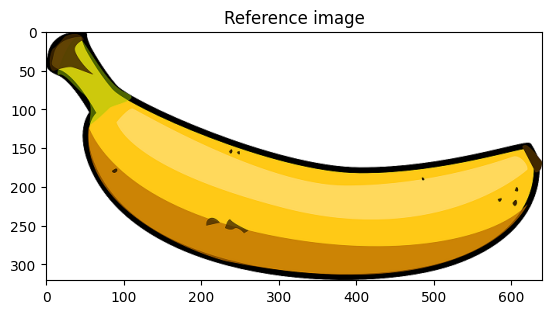

In [58]:
# Read the reference image and display it using the following command:
ref_image = cv2.imread(dir + 'bananaref.png')

plt.imshow(ref_image[:,:,::-1])
plt.title("Reference image")
plt.show()

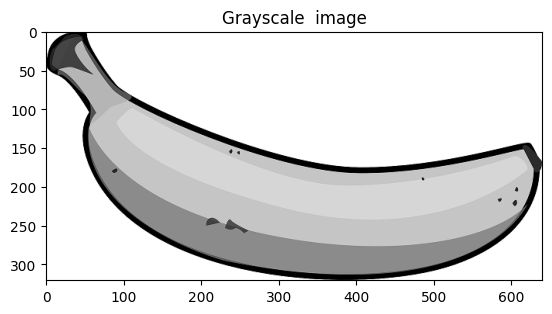

In [60]:
# Convert it to grayscale and display the result as follows:
gray_image = cv2.cvtColor(ref_image,cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale  image")
plt.show()

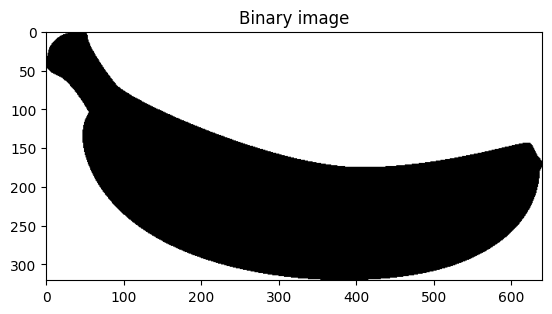

In [61]:
# Using a suitable threshold, convert it to binary and display the result:
ret,binary_im = cv2.threshold(gray_image,245,255,\
                cv2.THRESH_BINARY)

plt.imshow(binary_im, cmap='gray')
plt.title("Binary image")
plt.show()

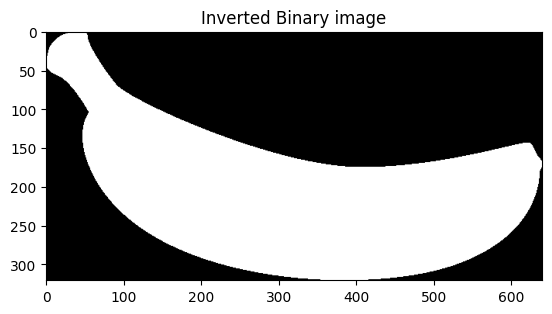

In [62]:
# To make the object white and the background black (which is required for the contour detection command in OpenCV), we will invert the image:
binary_im= ~binary_im

plt.imshow(binary_im, cmap='gray')
plt.title("Inverted Binary image")
plt.show()

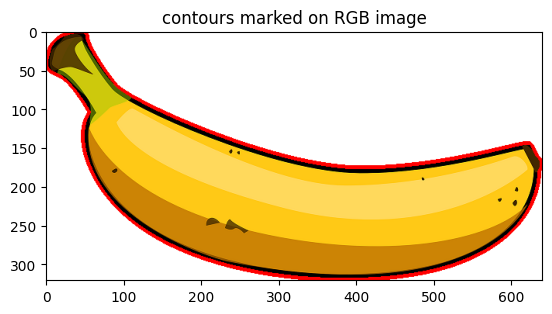

In [63]:
# Find the external boundary of this shape and draw a red outline on it:
ref_contour_list,hierarchy = cv2.findContours(binary_im,\
                             cv2.RETR_EXTERNAL,\
                             cv2.CHAIN_APPROX_SIMPLE)

with_contours = cv2.drawContours(ref_image, \
                ref_contour_list,-1,(0,0,255),3)

plt.imshow(with_contours[:,:,::-1])
plt.title("contours marked on RGB image")
plt.show()

In [64]:
print('Total number of contours:')
print(len(ref_contour_list))

Total number of contours:
1


In [68]:
# Put this contour at index 0 of the list because it is the banana. It is also the only contour in this list
reference_contour = ref_contour_list[0]


# Now, we have to compare each fruit contour we detected in the original image of the fruits with the reference contour of the banana
dist_list= [ ]
for cnt in contours:
    retval=cv2.matchShapes(cnt, reference_contour,1,0)
    dist_list.append(retval)

# The next task is to find the two contours at the smallest distances from the reference contour.
sorted_list= dist_list.copy()
# Now, sort this list in ascending order:
sorted_list.sort()

print(sorted_list)


[1.2692130505335848, 1.269213050534173, 1.6618014776874734, 1.771151523726344, 1.8150005423795166, 1.9329380069362876]


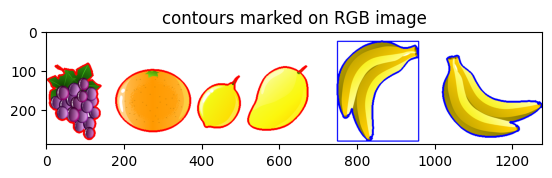

In [71]:
# In the original dist_list list, find the indices where the smallest and second smallest distances are present:
# index of smallest distance
ind1_dist= dist_list.index(sorted_list[0])
# index of second smallest distance
ind2_dist= dist_list.index(sorted_list[1])

# Initialize a new empty list and append the contours at these two indices to it:
banana_cnts= [ ]
banana_cnts.append(contours[ind1_dist])
banana_cnts.append(contours[ind2_dist])

# Now, draw these two contours on the image in blue:
with_contours = cv2.drawContours(image, banana_cnts,\
                                 -1,(255,0,0),3)

plt.imshow(with_contours[:,:,::-1])
plt.title("contours marked on RGB image")
plt.show()

<h2>Exercise: Detecting an Upright Banana from the Image of Fruits</h2>
In this task, you will build on the work you did in the last exercise. In the previous exercise, you detected the two banana bunches in the image where multiple fruits were present. One bunch was in a horizontal position, and the other was in a vertical position. In this exercise, you will detect the banana bunch that is in an upright position 

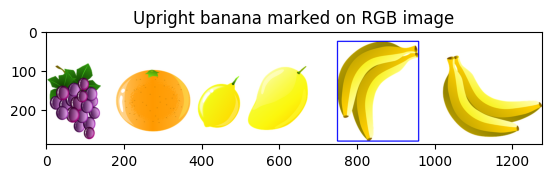

In [74]:
# Use a for loop to check each of these two contours one by one. 
# If its height is greater than its width, plot a blue bounding box around it on the copy of the image you had saved earlier

for cnt in banana_cnts:
    x,y,w,h = cv2.boundingRect(cnt)
    if h>w:
        cv2.rectangle(imageCopy,(x,y),(x+w,y+h),\
                      (255,0,0),2)

plt.imshow(imageCopy[:,:,::-1])
plt.title("Upright banana marked on RGB image")
plt.show()

<h2>Activity: Identifying a Character on a Mirrored Document</h2>
You are given two images. The first is of a rotated handwritten note that you captured through a mirror:
The second image is where you explicitly tell your program what the letter 'B' looks like. Your task is to write a program to identify where the letter 'B' occurs in the preceding image. 

In [75]:
import cv2
import matplotlib.pyplot as plt

#Read the image as a BGR image:
dir = "The-Computer-Vision-Workshop/Chapter04/data/"

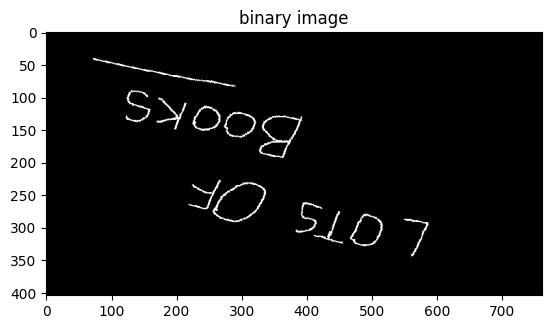

In [76]:
image = cv2.imread(dir  + 'phrase_handwritten.png')
imagecopy= image.copy()

# Convert the image to grayscale as follows:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Now, convert the image into binary and display it as follows:
ret,binary_im = cv2.threshold(gray_image,0,255,\
                              cv2.THRESH_OTSU)
plt.imshow(binary_im, cmap='gray')
plt.title("binary image")
plt.show()

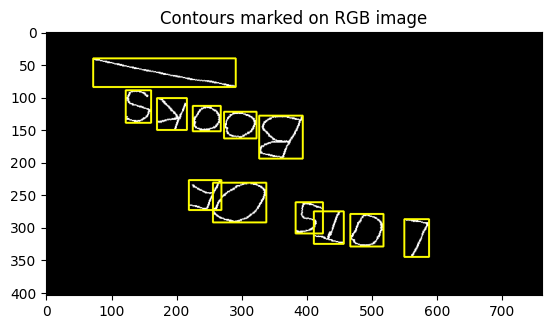

In [77]:
# Now, find all the contours on this image.
# Note that the letter 'B' has two holes inside it. If you use any method other than cv2.RETR_EXTERNAL, then 'B' would be detected as three contours instead of one

contours_list,_ = cv2.findContours(binary_im,\
                  cv2.RETR_EXTERNAL,\
                  cv2.CHAIN_APPROX_SIMPLE)

# Now, draw all the detected contours on the image using rectangular bounding boxes. Let's use yellow (its color code is 0, 255, 255) and a thickness of 2.
for cnt in contours_list:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0, 255, 255),2)
    
plt.imshow(image[:,:,::-1])
plt.title("Contours marked on RGB image")
plt.show()

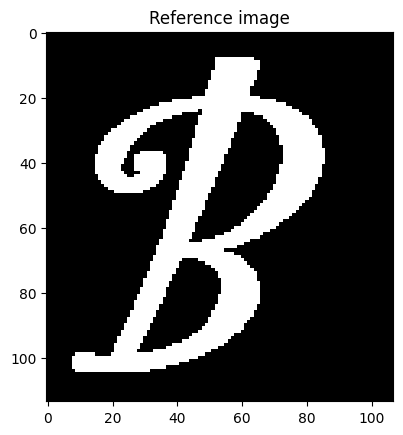

In [78]:
# Now that we have detected all external blobs on the handwritten note, the next step is to compare each detected blob with our reference shape to find the closest match
ref_gray = cv2.imread(dir + 'typed_B.png', cv2.IMREAD_GRAYSCALE)

# Convert the image into binary and display the result
ret, ref_binary = cv2.threshold(ref_gray,0, 255, \
                                cv2.THRESH_OTSU)

plt.imshow(ref_binary, cmap="gray")
plt.title("Reference image")
plt.show()



In [79]:
# Find all the contours on this reference.
ref_contour_list,_ = cv2.findContours(ref_binary, \
                     cv2.RETR_EXTERNAL, \
                     cv2.CHAIN_APPROX_SIMPLE)
# Note that here, we are again using the cv2.RETR_EXTERNAL retrieval mode because this will give you a single outline on the boundary shape

# Next, as a good programming practice, make sure that there is one, and only one detected contour in the ref_contour_list list
if len(ref_contour_list)==1:
    ref_contour= ref_contour_list[0] 
else: # stop the program
    import sys
    print('Reference image contains more than 1 contour. '\
          'Please check!')
    sys.exit()



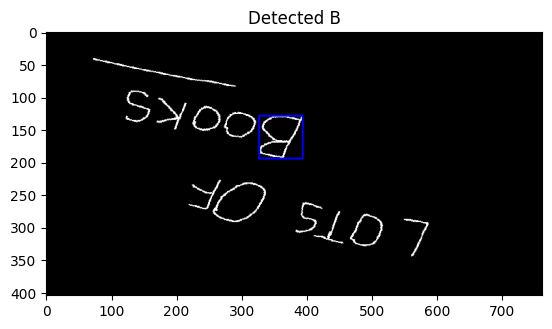

In [81]:
# Now, compare each contour on the handwritten note with the detected contour on the reference image using a for loop.
ctr= 0
dist_list= [ ]
for cnt in contours_list:
    retval = cv2.matchShapes(cnt, ref_contour, \
             cv2.CONTOURS_MATCH_I1,0)
    dist_list.append(retval)
    ctr= ctr+1

# Find the minimum distance in dist_list:
min_dist= min(dist_list)
    
# Find the index of this minimum distance in dist_list. 
ind_min_dist= dist_list.index(min_dist)

# Get the contour of interest from the list of contours
required_cnt= contours_list[ind_min_dist]

# Get a bounding box that will enclose this contour:
x,y,w,h = cv2.boundingRect(required_cnt)

# Draw a bounding box around this contour on a fresh copy of the image using any color (say, blue) and any line thickness (say, 2)
cv2.rectangle(imagecopy,(x,y),(x+w,y+h),\
              (255, 0, 0),2)

plt.imshow(imagecopy[:,:,::-1])
plt.title("Detected B")
plt.show()